# <div style="text-align:center">Handout: "Historical Background"</div>

## <span style="color:blue">1. Background</span>

### 1.1. Classical vs Quantum Physics

<ul>
<li>Newton’s mechanics and Maxwell’s theory of electromagnetism are referred to as **classical physics**</li>
<li>Despite success of classical physics, it could not explain several experimental observations that appeared at the end of XIX and the beginning of XX centuries
</li>
<li>Problems of classical physics:
<ul>
<li>Blackbody radiation</li>
<li>Photoelectric effect</li>
<li>Spectral lines</li>
</ul>
</li>
<li>These observations can be correctly described using quantum mechanics: provides correct description of molecules, atoms, and subatomic particles</li>
</ul>

### 1.2. Electromagnetic radiation

Heated objects emit radiation (glow)!  

As the temperature increases, radiation changes from <span style="color:red">red</span> to <span style="color:blue">blue</span>.  

Increasing temperature increases frequency $\nu$

<img src="../image/em_spectrum.png" width="700">  

Source: Brown, T. L. Chemistry : The Central Science, 14th ed.; Pearson: New York, 2018.


Frequency $\nu$ and wavelength $\lambda$ are inveresely related:
\begin{align}
\nu = \frac{c}{\lambda}
\end{align}
where $c$ is the speed of light, $2.998*10^{-8} m/s$.  

Increasing temperature $T$ increases frequency ($\nu$) of the radiation

## <span style="color:blue">2. Blackbody Radiation</span>

Most *real* objects absorb and emit light at **certain** frequencies  

A blackbody is an *ideal/unphysical* object which absorbs and emits at **all** frequencies  

### 2.1. Rayleigh-Jeans Law

Classically, the energy density of a blackbody came from the work done by Lord Rayleigh and J.H. Jeans and is appropriately-named the **Rayleigh-Jean's law**.

\begin{align}
\rho_\nu (T) d\nu = \frac{8 \pi k_B T}{c^3} \nu^2 d\nu
\end{align}


The Rayleigh-Jeans theory assumes that radiation is emitted by *oscillating* electrons with energies that have **any** values

In the next few sections of this notebook, we will explore the failure of Rayleigh-Jean's law at modeling high frequency radiation!

#### Example: Rayleigh-Jeans Law

First, let's define some constants:

In [1]:
# Use comments in your code cells to make the code more readible
# Make sure your code is clean and variables have readable names

# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define constants
h = 6.634*10**(-34) # (J/s)  Planck's constant
c = 2.998*10**(17)  # (nm/s) Speed of light
k = 1.381*10**(-23) # (J/K)  Boltzmann constant

Now, we define a function for Rayleigh-Jean's law that takes a temperature $T$ $(K)$ and a range of wavelengths $\lambda$ $(nm)$ as parameters:

In [2]:
# Define function to calculate blackbody energy density using Rayleigh-Jean's Law
def rj_law(la,temp):
    return (8.0*np.pi*k*temp)/(la**4)

Next, we can define parameters of our plot (feel free to experiment with these values to see how the plot changes!)

In [3]:
la = np.arange(100,6100,50)    # range of wavelengths from 500 to 6000, increments of 100 (units: nm)
T  = 5500                      # temperature (units: Kelvin)

Now, let's plot the energy density of the blackbody radiation that Rayleigh-Jean's Law predicts for this range of wavelengths

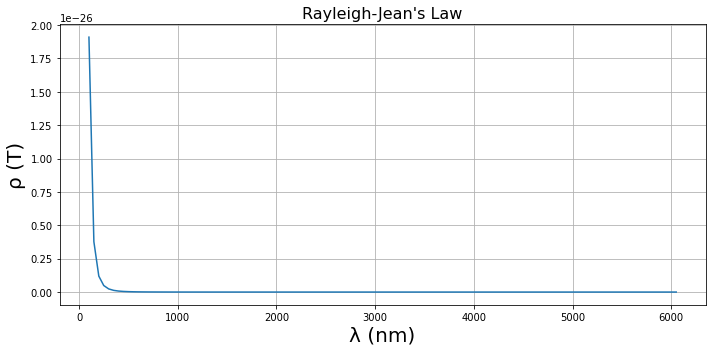

In [4]:
# Evaluate wavefunction at each x
rj_energy_values = rj_law(la,T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(la, rj_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Rayleigh-Jean\'s Law', fontsize=16)
plt.tight_layout()
plt.grid()

**Question: What do you notice as wavelength decreases/frequency increases?**

**<span style="color:red">Problem: Classical theory and experiment diverge as frequency of radiation approaches ultraviolet region!</span>**

### 2.2. Planck's Distribution Law

In 1900, Max Planck provided the first successful explanation of blackbody radiation. Planck assumed that energies of electrons are discrete -- proportional to an integral multiple of the frequency:
\begin{align*}
E = nh\nu \ \ \ \ \ \ \ \ \ \ \ \ n &= 0,1,2,3\cdots \\
                                  h &= 6.626 * 10^{-34} J \cdot s \ \ \ \ \ \ \ \ \ \text{Planck's constant}
\end{align*}

Using this quantization of energy, Planck then derived his own equation for energy density:

\begin{align}
\rho_\nu (T) d\nu = \frac{8 \pi h}{c^3} \frac{\nu^3 d\nu}{e^{h\nu/k_B T}-1}
\end{align}

Notice that Planck's distribution law reduces to Rayleigh-Jeans law at small $\nu$!

#### Example: Planck's Distribution Law

Let's define another function, this time for Planck's distribution law:

In [5]:
# Define function to calculate blackbody energy density using Planck's Distribution Law
def plancks_law(la,temp):
    return ((8.0*np.pi*h*c)/(la**5) * np.e**(-h*c/(la*k*temp)))/(1-np.e**(-h*c/(la*k*temp)))

Now we can plot the blackbody energy density spectrum at the same wavelengths $\lambda$ and the same temperature $T$.

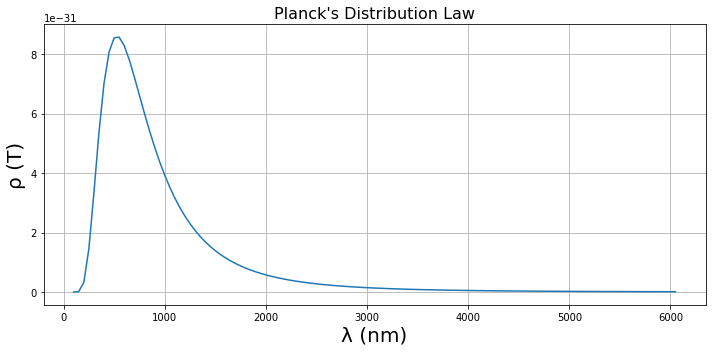

In [6]:
# Evaluate energy density at each wavelength @ temp T
p_energy_values = plancks_law(la,T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(la, p_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Planck\'s Distribution Law', fontsize=16)
plt.tight_layout()
plt.grid()

### 2.3. Application: Surface temperature of star from spectral data

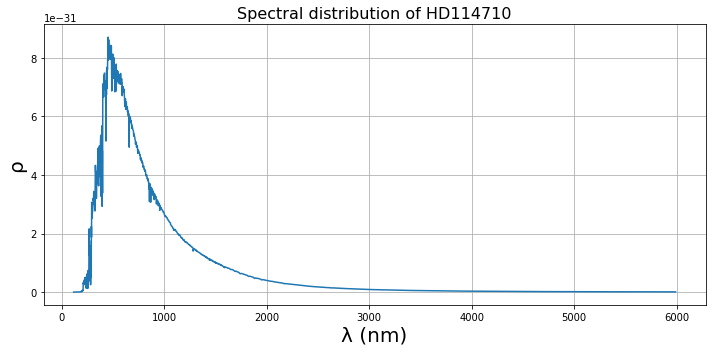

In [7]:
# Create variable for the name of the file
### All y-axis units are in W/cm^2/micron and x-axis units are in microns ###

filename = 'star_data/hd114710um.txt'
starname = 'HD114710'
#filename = 'star_data/hd206860um.txt'
#starname = 'HD206860'
#filename = 'star_data/hd128167um.txt'
#starname = 'HD128167'

# Make empty lists to append values from star data file
x_values = []
y_values = []

# Open and read data from file
infile = open(filename, 'r')

lines = infile.readlines()

for line in lines:
    sline = line.split()
    if float(sline[0])*1000 <= 6000 and float(sline[1]) > 0:
        x_values.append(float(sline[0])*1000.)               # Division by  1000 for unit conversion from data 
        y_values.append(float(sline[1])/100000000000000000.) # Division by 10^17 for unit conversion from data
        
# Close the file
infile.close()

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ', fontsize=20)
plt.title('Spectral distribution of %s' % starname, fontsize=16)
plt.tight_layout()
plt.grid()

Stellar spectra obtained by:  
Antígona Segura, Kara Krelove, James F. Kasting, Darrell Sommerlatt, Victoria Meadows, David Crisp, Martin Cohen, and Eli Mlawer.Astrobiology.Dec 2003.689-708. http://doi.org/10.1089/153110703322736024

What we will do next is run a non-linear least-squares fitting function on this spectral data with the Planck's Distribution Law equation to determine the "predicted" temperature of the star HD114710:

In [8]:
from scipy.optimize import curve_fit

pred_T, covariance = curve_fit(plancks_law, x_values, y_values, p0=2000)

print ('Predicted temperature: %f K' % pred_T)

Predicted temperature: 5275.553485 K


Now, let's plot the spectral data and Planck's distribution law with our predicted temperature!

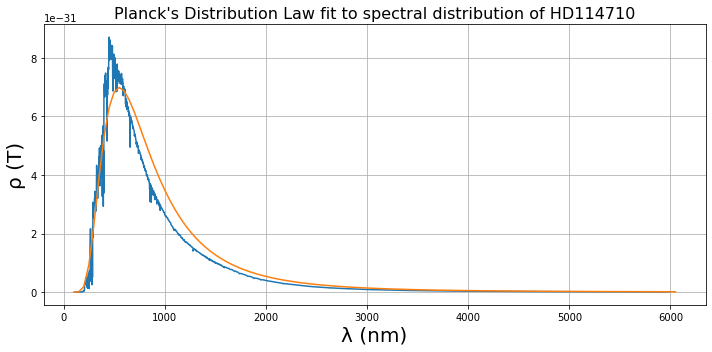

In [9]:
# Calculate new y-values with fitted temperature
fit_p_energy_values = plancks_law(la,pred_T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values)
plt.plot(la, fit_p_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Planck\'s Distribution Law fit to spectral distribution of %s' % starname, fontsize=16)
plt.tight_layout()
plt.grid()

## <span style="color:blue">2. Photoelectric Effect</span>

Ultraviolet light causes electrons to be emitted from a metallic surface. The ejection of electrons from the surface of a metal by radiation is called photoelectric effect. The classical explanation was that the surface electrons oscillated along the field of the incoming electromagnetic radiation and broke away with a kinetic energy that depended on the intensity of the radiation. Now let's use classical theory to predict the kinetic energy of the emitted electrons.

In [10]:
# Use comments in your code cells to make the code more readible
# Make sure your code is clean and variables have readable names

# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define function to calculate kinetic energy of the emitted electrons 
#for any given intensity of incoming radiation
def calc_ke(i):
    return np.square(i)

Enter a intensity between 1 and 10:

In [11]:
i = 4        # Intensity

Now, let's calculate the KE as a function of intensity. 

In [12]:
# Make sure that n is integer and n > 0
i = int(i)

# Evaluate KE at each i
calc_ke(i)

16

#### <span style="color:red">Now enter a higher intensity and check what happens to the KE. 

Now lets add a range of intensities to observe what happens.

In [13]:
n = 100

In [14]:
# Make sure that n is integer and n > 0
t = np.arange(0.,n,1.)

# Evaluate KE at each intensity
KE = []
for i in t:
    KE.append(calc_ke(i))

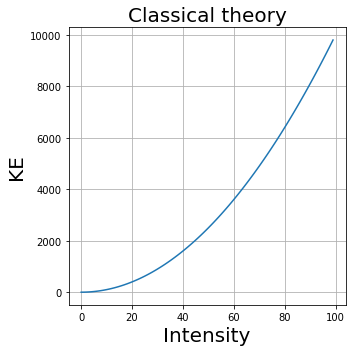

In [15]:
# Set up graph and plot
plt.figure(figsize=(5,5))
plt.plot(t, KE)
plt.xlabel("Intensity", fontsize=20)
plt.ylabel("KE", fontsize=20)
plt.title("Classical theory", fontsize=20)
plt.tight_layout()
plt.grid()

If we make the same analysis for frequency, we observe that classical theory predicts the KE to be independent of the frequency.

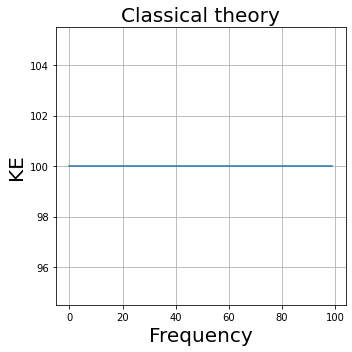

In [16]:
t = np.arange(0.,n,1.)
constant = 100

# Evaluate KE at each intensity
KE = []
for i in t:
    KE.append(constant)
    
# Set up graph and plot
plt.figure(figsize=(5,5))
plt.plot(t, KE)
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("KE", fontsize=20)
plt.title("Classical theory", fontsize=20)
plt.tight_layout()
plt.grid()

#### However, experimentally we observe something different.
<figure>
  <img src="../image/photoelectric_effect_zinc.svg" alt="" width=400px>
  <figcaption>Fig : Experimental relation between kinetic energy of emitted electrons and frequency of incoming radiation</figcaption>
</figure>


In order to explain the discrepancies between classical and experimental findings, Einstein proposed that radiation existed in small packets, known as **photons**, with energy  
\begin{align}
E=h\nu
\end{align}

The main observations were:
    

* Electrons are only ejected when the incoming radiation has a higher frequency than the threshold frequency of the metal.
<br/>
* Kinetic energy of the emitted electrons are independent of the intensity of the incoming radiation   
    

\begin{align}
KE=h\nu - \phi
\end{align}
Here, $\phi$ is the work function of the metal and can be expressed as $\phi = h\nu_{0}$, $\nu_{0}$ being the threshold frequency of the metal.

#### Problem 1. When light with frequency 6.20 * 1e14 Hz is shone on a metal, electrons are emitted with a energy of 3.28 * 1e-20 J. What is the workfunction of the metal? 

In [17]:
# Import Python modules
import numpy as np

# Define function to calculate workfunction of the metal
def calc_workfunction(f,k):
    h = 6.626 * 1e-34
    return h*f - k

In [18]:
#Enter f and k
freq = 6.2 * 1e14
ke = 3.28 * 1e-20

In [19]:
calc_workfunction(freq,ke)

3.78012e-19

#### <span style="color:red">Can you guess the metal? How would the KE change if Tin was used instead?

## <span style="color:blue">3. De Broglie Wave-Particle Duality</span>


#### <span style="color:red">Use this [double-slit simulation](https://ophysics.com/l5.html) to obtain the interference pattern of light waves.

When the same experiment was carried out with a beam of electrons, a similar interference pattern was observed.

![Purl](https://upload.wikimedia.org/wikipedia/commons/7/7d/Wave-particle_duality.gif "p")

This proves the dual nature of light as particles and waves.

## <span style="color:blue">4. Energy Uncertainty of Quantum States</span>

Imagine a system that is described by three simple states with energies: $E_{1}$, $E_{2}$, and $E_{3}$. The energies of these states are related by:

\begin{align*}
E_{2} &= 2 \cdot E_{1} \\
E_{3} &= 3 \cdot E_{1}
\end{align*}

The probability of observing one of these three states is given by:

\begin{align*}
p_{i} = \frac{a_{i}}{a_{1} + a_{2} + a_{3}}
\end{align*}

where the values $a_{i}$ are \textit{weighing coefficients} that modulate how dominant that state is in describing this imaginary system.

Example: Create a superposition of these three fictitious states by assigning different values to $a_{1}$, $a_{2}$, and $a_{3}$ such that $a_{1}+a_{2}+a_{3}=1$.

In [32]:
# Assign values to a_1, a_2, a_3
a1 = 4/7
a2 = 2/7
a3 = 1/7

In [33]:
# Make a list out of the three weights created above
a    = [a1, a2, a3]

# Make an empty list into which we will append probability values
prob = []

# Loop through the weights of each state and calculate the corresponding probability
for k in a:
    p = k/(a1+a2+a3)
    prob.append(p)
    
print (prob)

[0.5714285714285714, 0.2857142857142857, 0.14285714285714285]


In [24]:
# This function calculates the average energy according to the formula <E> = p_1*E_1 + p_2*E_2 + p_3*E_3
def calc_avg_e(p,E):

    # Create variable for the average energy
    avg_en = 0.0

    # Loop through states i, adding p_i*E_i to the average energy
    for i in range(3):
        avg_en += p[i]*(i+1)*E

    return avg_en

**1. Calculate an average energy in terms of $E_{1}$.**

In [36]:
# Define a starting value for E_1
e_1 = 1

# Calculate the average energy using the probabilities created above and starting energy
calc_avg_e(prob,e_1)

1.5714285714285714

In [43]:
#Calculate average energy square according to the formula <E^2> = p1E1^2 + p2E2^2 +p3E3^2
def calc_avg_e2(p,E):
    av_energy = 0.0
    for i in range(3):
        av_energy += p[i]*np.square((i+1)*E)  
    return av_energy

In [44]:
calc_avg_e2(prob,e_1)

3.0

In [45]:
#Calculate energy uncertainity
def calc_energy_uncertainity(E,E2):  
    return np.sqrt(E2-np.square(E))

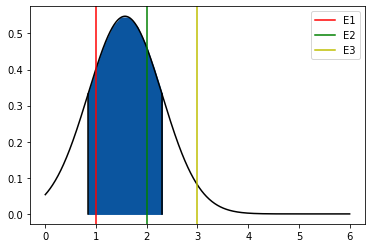

In [51]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

ENERGY = calc_avg_e(prob,energy)
E2 = calc_avg_e2(prob,energy)
mean = ENERGY
std = calc_energy_uncertainity(ENERGY,E2)

x_min = 0
x_max = 6.0

x = np.linspace(x_min, x_max, 1000)
y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

# x coordinates for the lines
xcoords = [1, 2, 3]
# colors for the lines
colors = ['r','g','y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='E{}'.format(xc), c=c)

plt.legend()

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=None)
plt.show()

**Interactive Examples**
* *What sort of superposition of these three states would create a system with an energy uncertainty  of 0?*
<br/>
* *What sort of superposition of these three states would maximize the energy uncertainty?*
<br/>
* *What is the energy uncertainty of a system with probabilities for each of the three states: $p_{1}=0.43$, $p_{2}=0.35$, $p_{3}=0.22$*